# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Кузнецов Игорь Вячеславович БПИ2303
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

Минимальное расстояние от A до D: 4
Путь: A -> B -> C -> D


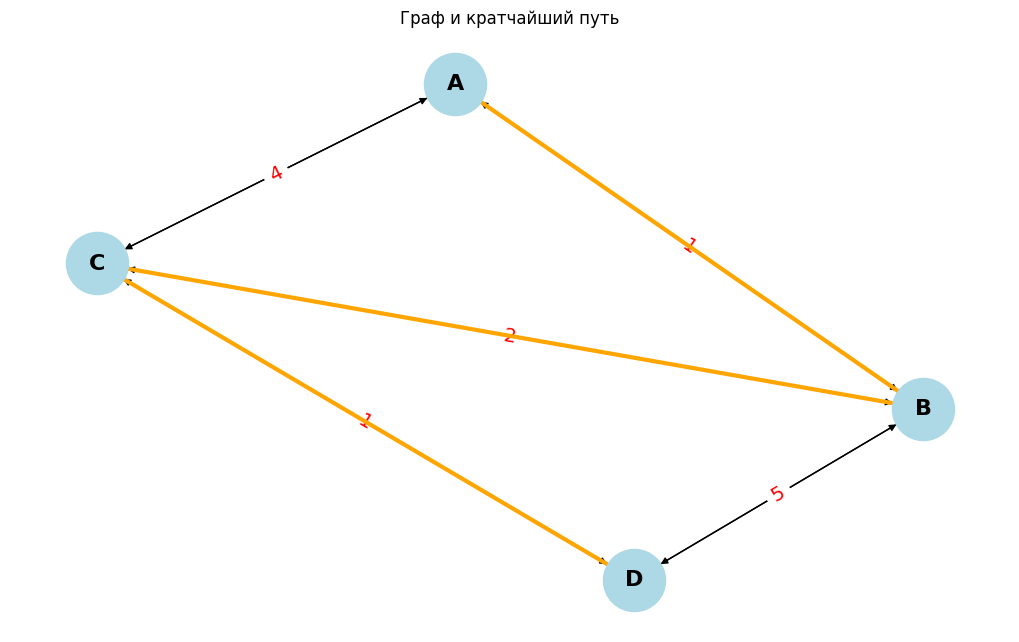

Путь от 65 до 83: 4 (дистанция: ['65', '61', '66', '83'])
Путь от 14 до 92: 15 (дистанция: ['14', '78', '83', '100', '56', '3', '59', '92'])
Путь от 93 до 73: 4 (дистанция: ['93', '24', '21', '38', '73'])
Путь от 65 до 35: 5 (дистанция: ['65', '81', '29', '40', '37', '35'])
Путь от 23 до 83: 10 (дистанция: ['23', '101', '3', '39', '14', '83'])
Путь от 104 до 61: 3 (дистанция: ['104', '95', '32', '61'])
Путь от 16 до 13: 4 (дистанция: ['16', '24', '13'])
Путь от 82 до 74: 6 (дистанция: ['82', '58', '105', '74'])
Путь от 60 до 48: 2 (дистанция: ['60', '15', '48'])
Путь от 57 до 2: 5 (дистанция: ['57', '47', '2'])
Путь от 2 до 43: 8 (дистанция: ['2', '15', '43'])
Путь от 11 до 8: 2 (дистанция: ['11', '67', '8'])
Путь от 15 до 46: 3 (дистанция: ['15', '4', '21', '46'])
Путь от 10 до 35: 3 (дистанция: ['10', '55', '112', '35'])
Путь от 16 до 95: 9 (дистанция: ['16', '40', '95'])
Путь от 98 до 86: 3 (дистанция: ['98', '56', '8', '86'])
Путь от 55 до 29: 2 (дистанция: ['55', '29'])
Путь от 16

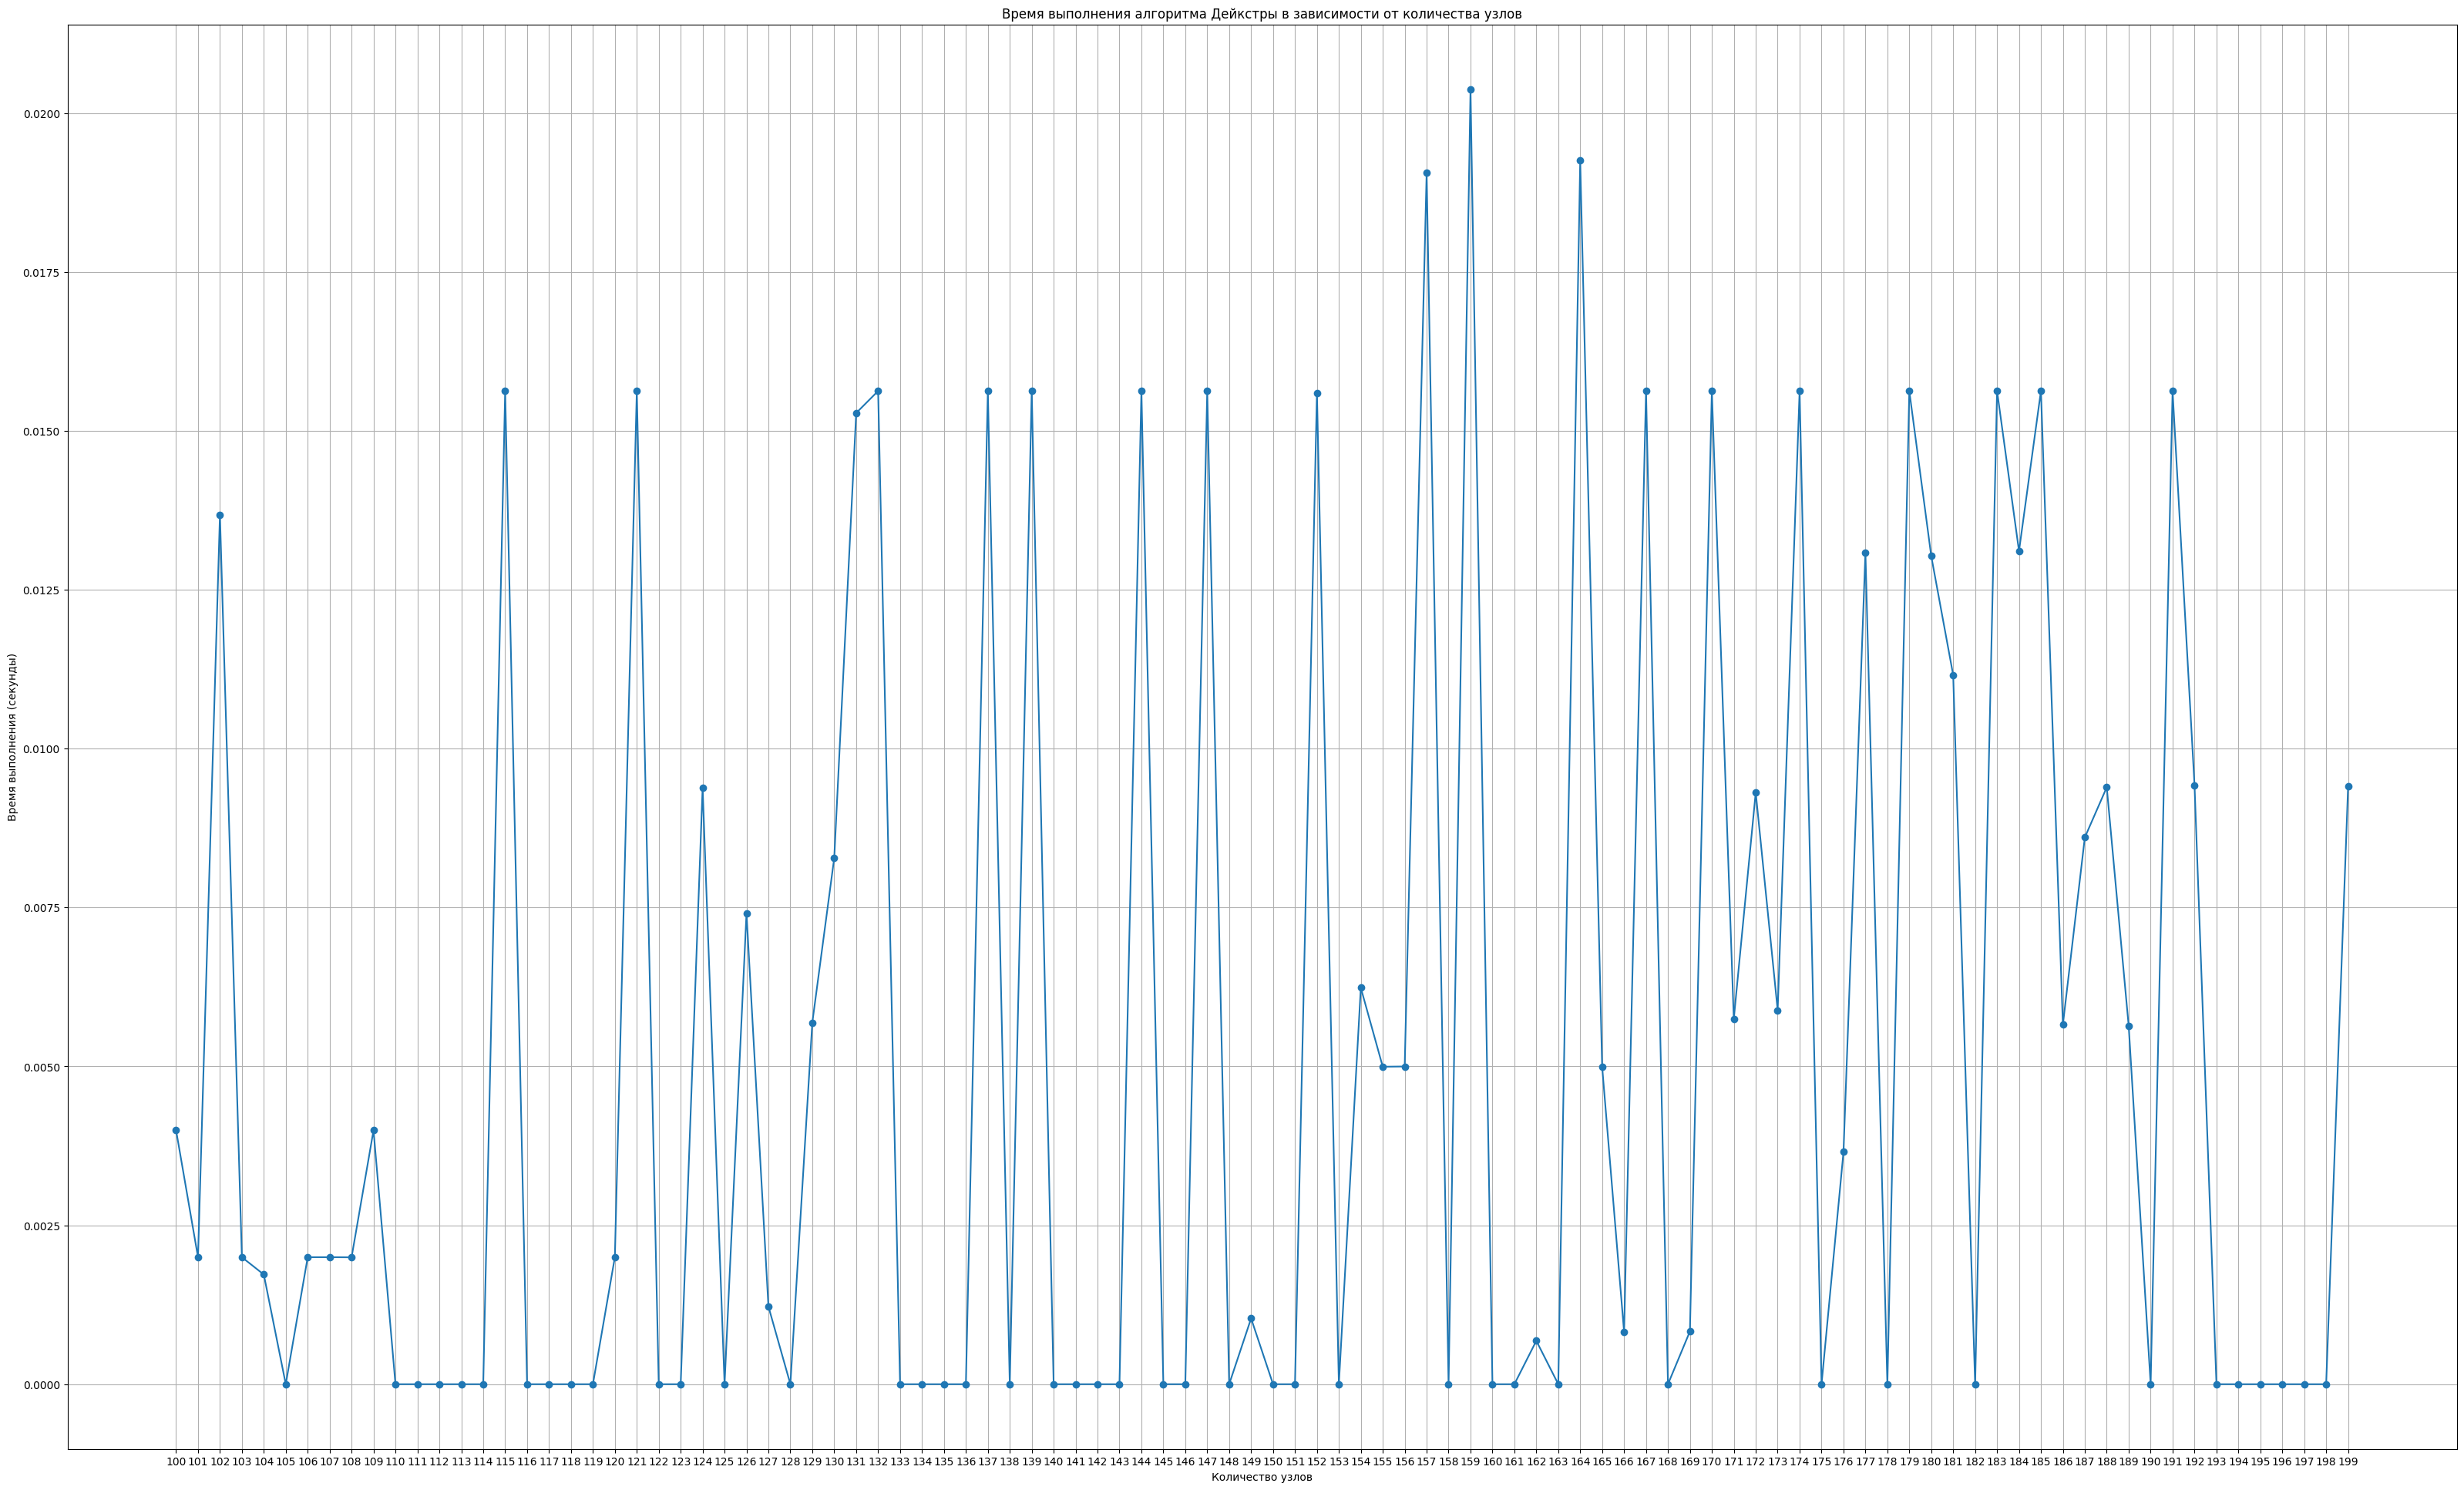

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

def dijkstra(graph, start, target):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    visited = set()
    previous_vertices = {vertex: None for vertex in graph}

    while len(visited) < len(graph):
        current_vertex = None
        for vertex in distances:
            if vertex not in visited:
                if current_vertex is None or distances[vertex] < distances[current_vertex]:
                    current_vertex = vertex
        if current_vertex is None or distances[current_vertex] == float('infinity'):
            break
        visited.add(current_vertex)
        for neighbor, weight in graph[current_vertex].items():
            distance = distances[current_vertex] + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_vertices[neighbor] = current_vertex
    path = []
    current_vertex = target
    while current_vertex is not None:
        path.append(current_vertex)
        current_vertex = previous_vertices[current_vertex]
    path.reverse()

    return distances[target], path

def generate_random_graph(num_nodes, num_edges):
    graph = {str(i): {} for i in range(num_nodes)}
    edges = set()

    while len(edges) < num_edges:
        u = str(random.randint(0, num_nodes - 1))
        v = str(random.randint(0, num_nodes - 1))
        weight = random.randint(1, 10)

        if u != v and (u, v) not in edges and (v, u) not in edges:
            graph[u][v] = weight
            edges.add((u, v))

    return graph

def display_graph_with_path(graph, path):
    G = nx.DiGraph()
    for vertex, edges in graph.items():
        for neighbor, weight in edges.items():
            G.add_edge(vertex, neighbor, weight=weight)

    pos = nx.spring_layout(G)

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold', arrows=True)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=14)

    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='orange', width=3)

    plt.title("Граф и кратчайший путь")
    plt.show()

def random_benchmark():
  num_nodes_list = range(100, 200)  # Количество узлов
  execution_times = []
  paths = []

  for num_nodes in num_nodes_list:
    num_edges = num_nodes * (num_nodes - 1) // 2
    graph = generate_random_graph(num_nodes, random.randint(num_nodes, num_edges))
    
    start = random.choice(list(graph.keys()))
    end = random.choice(list(graph.keys()))
    
    start_time = time.time()
    path, distance = dijkstra(graph, start, end)
    execution_time = time.time() - start_time
    
    execution_times.append(execution_time)
    paths.append((start, end, path, distance))

  for start, end, path, distance in paths:
    print(f"Путь от {start} до {end}: {path} (дистанция: {distance})")

  plt.figure(figsize=(40, 24))
  plt.plot(num_nodes_list, execution_times, marker='o')
  plt.title('Время выполнения алгоритма Дейкстры в зависимости от количества узлов')
  plt.xlabel('Количество узлов')
  plt.ylabel('Время выполнения (секунды)')
  plt.grid(True)
  plt.xticks(num_nodes_list)
  plt.show()

graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

start_vertex = 'A'
target_vertex = 'D'
distance, path = dijkstra(graph, start_vertex, target_vertex)

print(f"Минимальное расстояние от {start_vertex} до {target_vertex}: {distance}")
print(f"Путь: {' -> '.join(path)}")

display_graph_with_path(graph, path)
random_benchmark()

### Вывод